**Support Vector Machine (SVM)**

It is powerful machine learning algorithm which is used in linear and non linear classification.


In [44]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [46]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 42)

In [50]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [52]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

Accuracy:81.67%


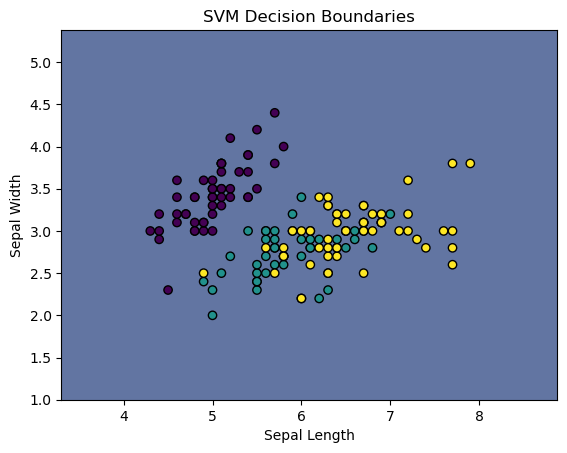

In [58]:
y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy*100:.2f}%')

import matplotlib.pyplot as plt
x = iris.data[:,:2]
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4 , random_state = 42)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

svm_model.fit(x_train, y_train)

x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min ,x_max, 0.02),np.arange(y_min, y_max, 0.02))
z = svm_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.8)
plt.scatter(x[:,0], x[:,1], c = y , edgecolor = 'k',marker = 'o')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundaries')
plt.show()





**Handle Missing Values**

In [75]:
import pandas as pd
from sklearn.impute import SimpleImputer

data = {'A' : [1,2,None,4],"B":[None,2,3,4],"C":[5,6,7,8]}
df = pd.DataFrame(data)

df_dropna = df.dropna()
imputer = SimpleImputer(strategy = 'mean')
df_imputer = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

print("Orignal DataFrame :")
print(df)
print("\nDataFrame after dropping rows missing values:")
print(df_dropna)
print("\nDataFrame after imputation:")
print(df_imputer)

Orignal DataFrame :
     A    B  C
0  1.0  NaN  5
1  2.0  2.0  6
2  NaN  3.0  7
3  4.0  4.0  8

DataFrame after dropping rows missing values:
     A    B  C
1  2.0  2.0  6
3  4.0  4.0  8

DataFrame after imputation:
          A    B    C
0  1.000000  3.0  5.0
1  2.000000  2.0  6.0
2  2.333333  3.0  7.0
3  4.000000  4.0  8.0


Standarization

In [78]:
from sklearn.impute import SimpleImputer

data = {'A' : [1,2,3,4],"B":[1,2,3,4]}
df = pd.DataFrame(data)
print(df)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

print("Orignal DataFrame :")
print(df)
print("\nDataFrame after standardization:")
print(df_scaled)


   A  B
0  1  1
1  2  2
2  3  3
3  4  4
Orignal DataFrame :
   A  B
0  1  1
1  2  2
2  3  3
3  4  4

DataFrame after standardization:
          A         B
0 -1.341641 -1.341641
1 -0.447214 -0.447214
2  0.447214  0.447214
3  1.341641  1.341641


In [86]:
from sklearn.preprocessing import MinMaxScaler

data = {'A' : [1,2,3,4],"B":[2,4,5,6]}
df = pd.DataFrame(data)
print(df)

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

print("Orignal DataFrame :")
print(df)
print("\nDataFrame after standardization:")
print(df_normalized)


   A  B
0  1  2
1  2  4
2  3  5
3  4  6
Orignal DataFrame :
   A  B
0  1  2
1  2  4
2  3  5
3  4  6

DataFrame after standardization:
          A     B
0  0.000000  0.00
1  0.333333  0.50
2  0.666667  0.75
3  1.000000  1.00
